<a href="https://colab.research.google.com/github/Binaryninja45/Almost-any-ML-problem/blob/main/ML_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn import manifold
%matplotlib inline

In [ ]:
data = datasets.fetch_openml('mnist_784', version=1, return_X_y=True)
pixel_values, targets = data
targets = targets.astype(int)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Here the pixel_values is a 2D array of shape

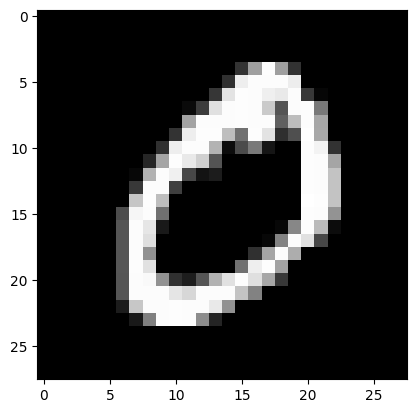

In [ ]:
single_image = pixel_values.iloc[1, :].values.reshape(28, 28)  # Using .iloc for integer-location based indexing and .values to get the underlying NumPy array
plt.imshow(single_image, cmap='gray')

### This creates the t-SNE transformation of the data, the *transformed_data* here is an array of shape 3000*2


In [ ]:
tsne_df = pd.DataFrame(np.column_stack((transformed_data, targets[:3000])), columns=["x", "y", "targets"])
tsne_df.loc[:,"targets"] = tsne_df.targets.astype(int)
tsne_df.head()

,x,y,targets
0,20.515184,-11.026083,5.0
1,57.560905,0.121864,0.0
2,-0.679077,-54.268143,4.0
3,-41.528664,11.559952,1.0
4,-10.032307,-33.632420,9.0


### Here we can see there are 3 coloums *x* , *y*, *targets*, x and y are two components from t-SNE decomposition and targets is the actual number.

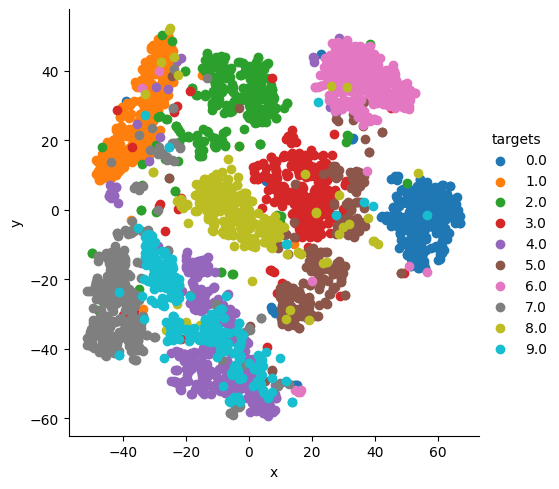

In [ ]:
grid = sns.FacetGrid(tsne_df, hue="targets", height=5)
grid.map(plt.scatter, "x", "y").add_legend()

### Plotting using seaborn and matplotlib, this is one way of visualizing unsupervised datasets, we can also do ***K-means clustering*** on the same dataset.